In [1]:
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pylab
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
num_gpu = 1 if torch.cuda.is_available() else 0

# load the models
from dcgan import Discriminator, Generator

D = Discriminator(ngpu=1).eval()
G = Generator(ngpu=1).eval()

# load weights
D.load_state_dict(torch.load('weights/netD_epoch_99.pth'))
G.load_state_dict(torch.load('weights/netG_epoch_99.pth'))
if torch.cuda.is_available():
    D = D.cuda()
    G = G.cuda()

In [3]:
linf_aut_eps03 = torch.Tensor(np.load("../../Excessive-Invariance/invariance_examples/linf/automated_eps03.npy"))
linf_aut_eps04 = torch.Tensor(np.load("../../Excessive-Invariance/invariance_examples/linf/automated_eps04.npy"))
linf_man_eps04 = torch.Tensor(np.load("../../Excessive-Invariance/invariance_examples/linf/manual_eps04.npy"))

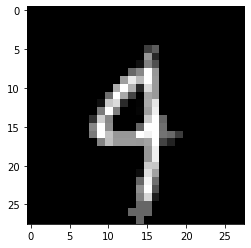

In [4]:
plt.imshow(linf_aut_eps04[0], cmap="gray")

In [5]:
import torchvision.datasets as dset

dataset = dset.MNIST(root="./data", download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.5,), (0.5,)),
                    ]))
dataloader = torch.utils.data.DataLoader(dataset, batch_size=128,
                                             shuffle=True, num_workers=4)

In [29]:
from PIL import Image


transform = transforms.Compose([
                        transforms.Lambda(lambda x: Image.fromarray(x.byte().numpy(), mode='L')),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5,), (0.5,)),
                    ])

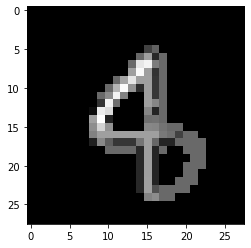

tensor(0.0029, device='cuda:0')


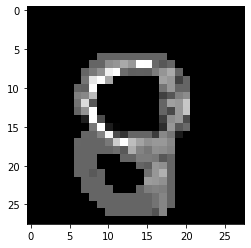

tensor(5.4338e-07, device='cuda:0')


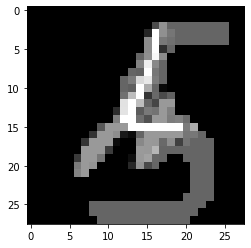

tensor(1.9475e-06, device='cuda:0')


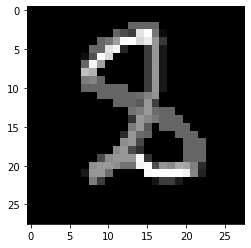

tensor(1.5266e-05, device='cuda:0')


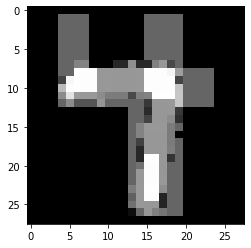

tensor(7.0926e-06, device='cuda:0')


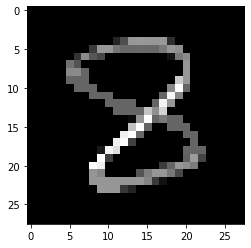

tensor(0.0028, device='cuda:0')


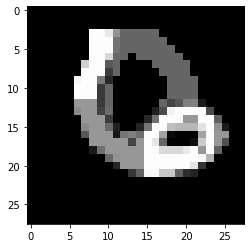

tensor(0.0030, device='cuda:0')


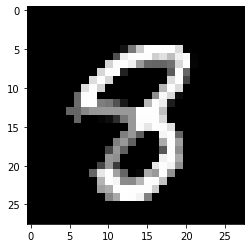

tensor(0.0401, device='cuda:0')


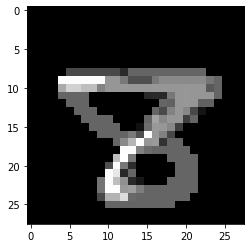

tensor(0.0821, device='cuda:0')


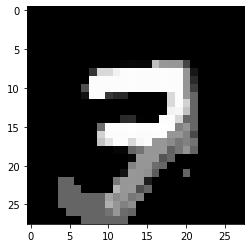

tensor(5.4867e-06, device='cuda:0')


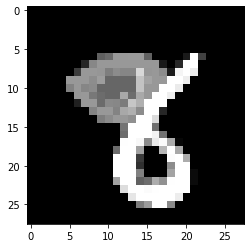

tensor(6.9463e-06, device='cuda:0')


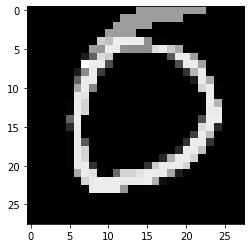

tensor(0.0054, device='cuda:0')


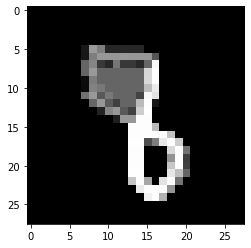

tensor(8.0736e-08, device='cuda:0')


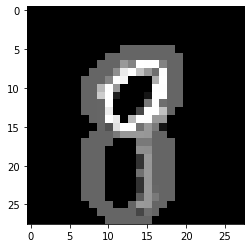

tensor(2.4464e-06, device='cuda:0')


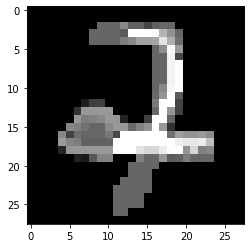

tensor(0.0018, device='cuda:0')


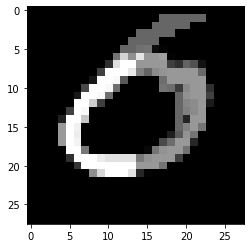

tensor(0.0635, device='cuda:0')


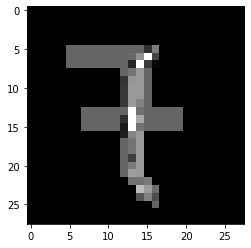

tensor(0.0606, device='cuda:0')


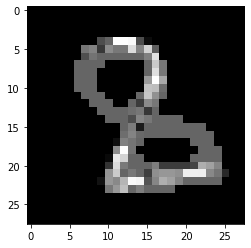

tensor(1.5145e-06, device='cuda:0')


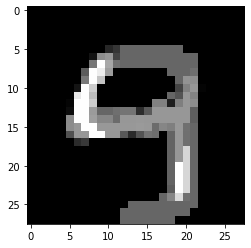

tensor(0.0336, device='cuda:0')


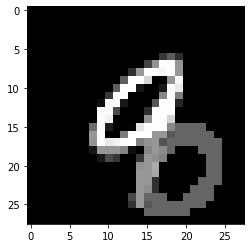

tensor(1.3628e-06, device='cuda:0')


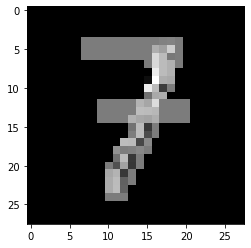

tensor(9.1317e-05, device='cuda:0')


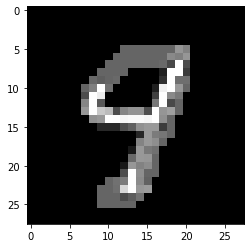

tensor(1.6313e-05, device='cuda:0')


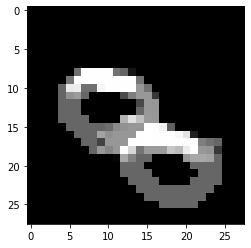

tensor(2.5774e-07, device='cuda:0')


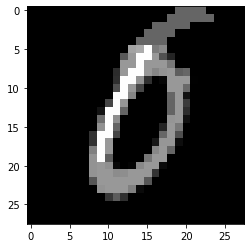

tensor(2.0883e-06, device='cuda:0')


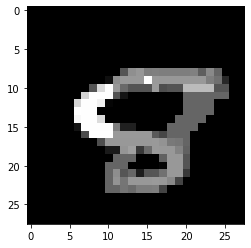

tensor(1.5909e-05, device='cuda:0')


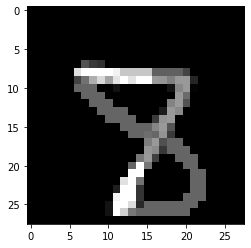

tensor(0.0011, device='cuda:0')


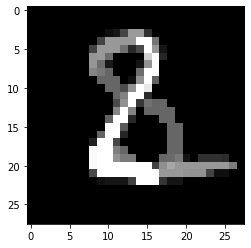

tensor(1.6017e-05, device='cuda:0')


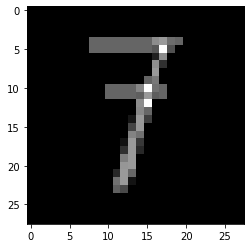

tensor(0.3161, device='cuda:0')


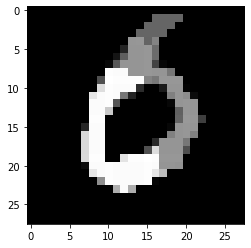

tensor(0.0053, device='cuda:0')


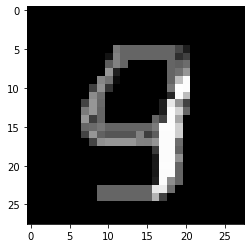

tensor(0.0022, device='cuda:0')


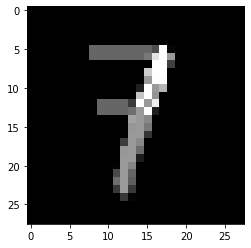

tensor(0.0007, device='cuda:0')


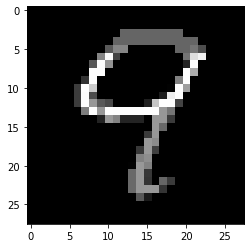

tensor(0.0002, device='cuda:0')


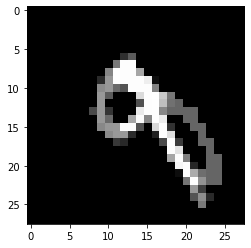

tensor(0.0018, device='cuda:0')


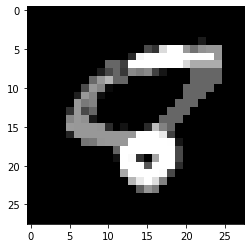

tensor(0.6940, device='cuda:0')


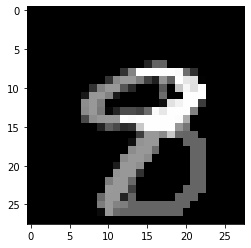

tensor(5.1372e-07, device='cuda:0')


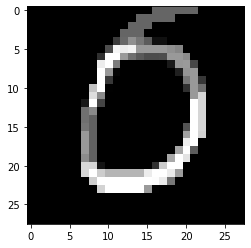

tensor(0.0074, device='cuda:0')


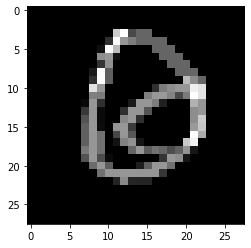

tensor(0.0009, device='cuda:0')


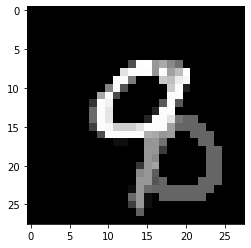

tensor(2.1647e-06, device='cuda:0')


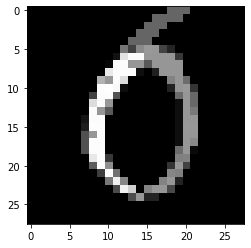

tensor(0.0117, device='cuda:0')


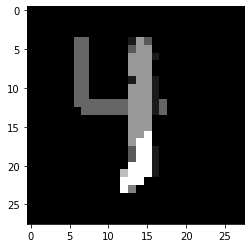

tensor(0.0163, device='cuda:0')


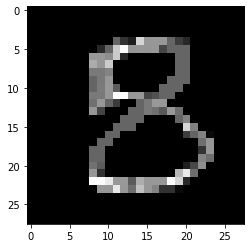

tensor(0.0494, device='cuda:0')


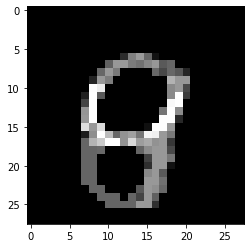

tensor(1.1182e-05, device='cuda:0')


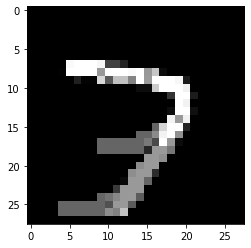

tensor(0.0023, device='cuda:0')


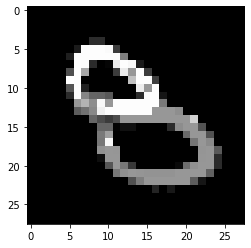

tensor(0.0011, device='cuda:0')


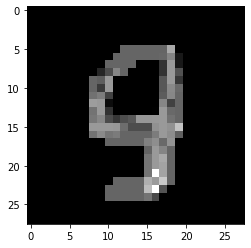

tensor(9.2244e-05, device='cuda:0')


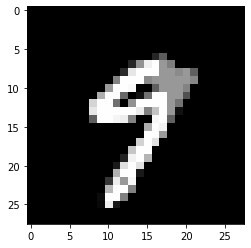

tensor(0.0051, device='cuda:0')


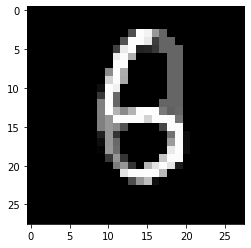

tensor(0.0008, device='cuda:0')


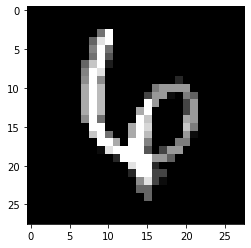

tensor(0.2162, device='cuda:0')


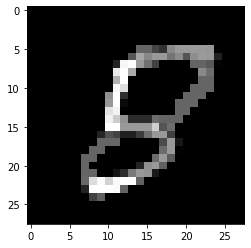

tensor(3.9646e-05, device='cuda:0')


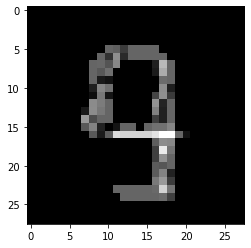

tensor(7.1884e-05, device='cuda:0')


In [62]:
test = torch.stack([transform(x) for x in linf_man_eps04])
out = D(test.cuda())
for sample, p in zip(test, out):
    plt.imshow(sample[0], cmap="gray")
    plt.show()
    print(p.data)

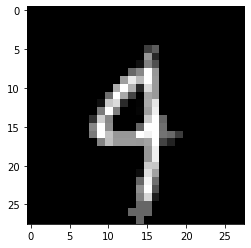

tensor(0.0152, device='cuda:0')


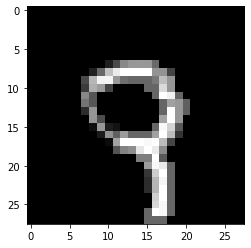

tensor(0.2549, device='cuda:0')


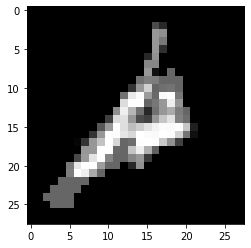

tensor(0.0193, device='cuda:0')


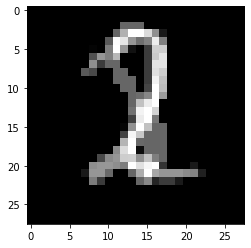

tensor(0.0001, device='cuda:0')


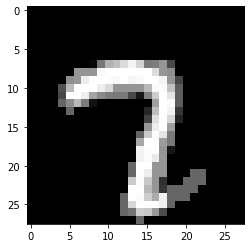

tensor(0.5372, device='cuda:0')


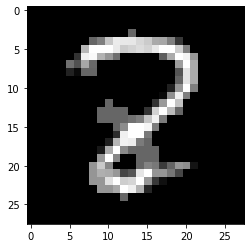

tensor(9.1510e-06, device='cuda:0')


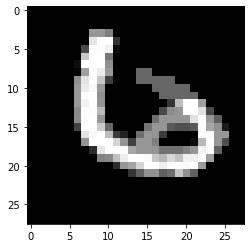

tensor(0.0008, device='cuda:0')


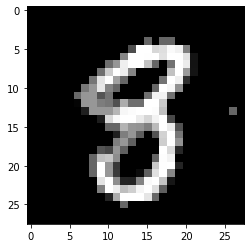

tensor(0.0013, device='cuda:0')


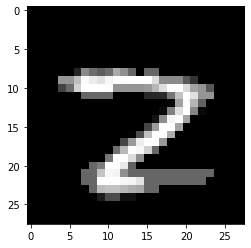

tensor(0.0001, device='cuda:0')


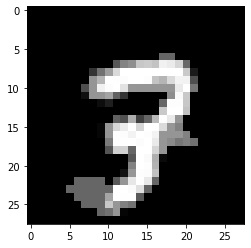

tensor(0.0049, device='cuda:0')


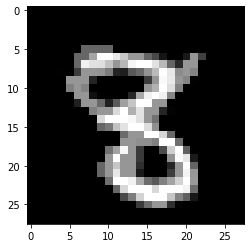

tensor(0.0019, device='cuda:0')


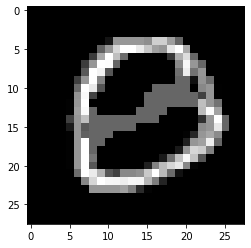

tensor(0.0005, device='cuda:0')


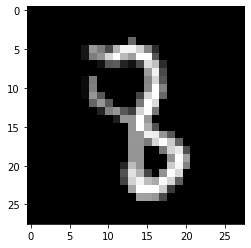

tensor(0.0365, device='cuda:0')


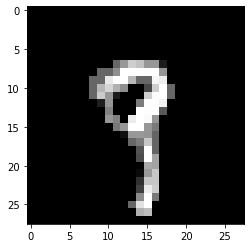

tensor(0.7844, device='cuda:0')


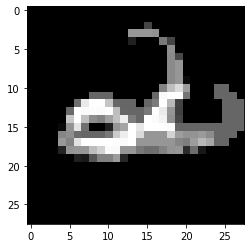

tensor(1.5574e-05, device='cuda:0')


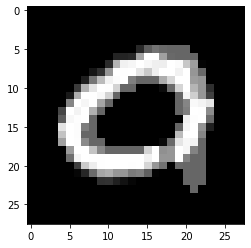

tensor(0.2178, device='cuda:0')


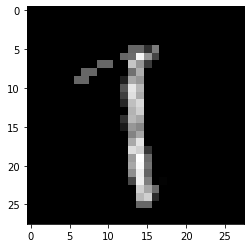

tensor(0.2854, device='cuda:0')


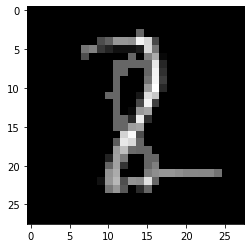

tensor(0.0106, device='cuda:0')


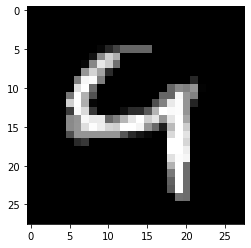

tensor(0.0057, device='cuda:0')


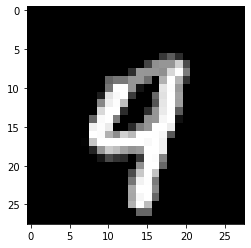

tensor(0.0728, device='cuda:0')


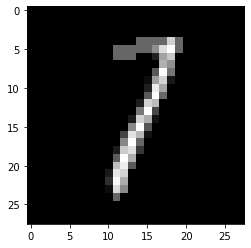

tensor(0.0211, device='cuda:0')


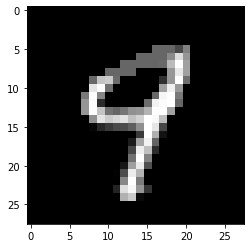

tensor(0.0024, device='cuda:0')


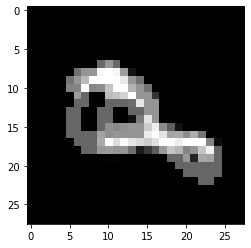

tensor(0.0003, device='cuda:0')


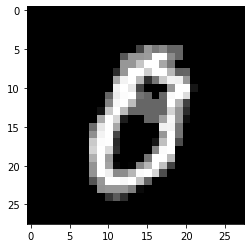

tensor(0.0004, device='cuda:0')


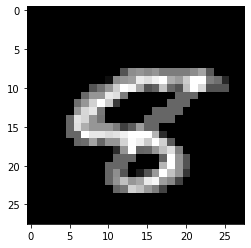

tensor(0.6625, device='cuda:0')


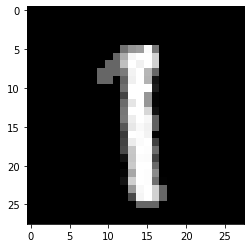

tensor(0.1133, device='cuda:0')


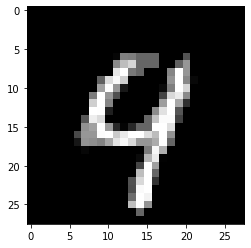

tensor(0.0130, device='cuda:0')


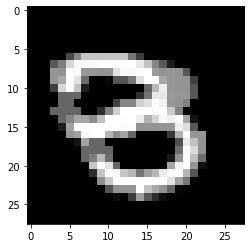

tensor(0.0617, device='cuda:0')


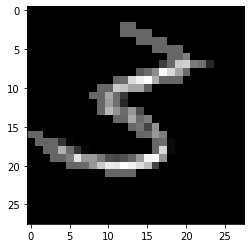

tensor(0.3259, device='cuda:0')


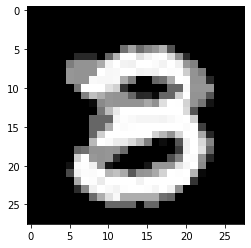

tensor(0.0065, device='cuda:0')


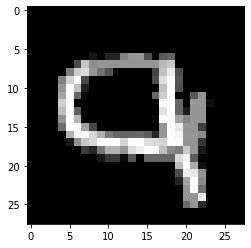

tensor(0.9795, device='cuda:0')


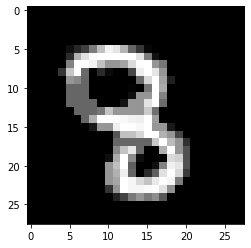

tensor(0.0015, device='cuda:0')


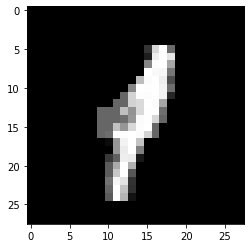

tensor(1.3134e-05, device='cuda:0')


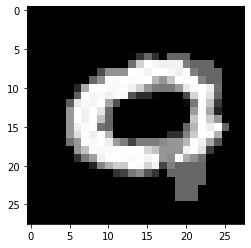

tensor(0.2696, device='cuda:0')


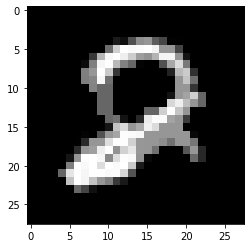

tensor(4.0801e-05, device='cuda:0')


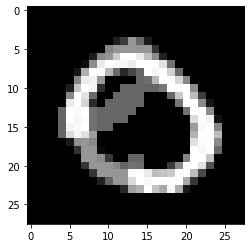

tensor(3.6671e-05, device='cuda:0')


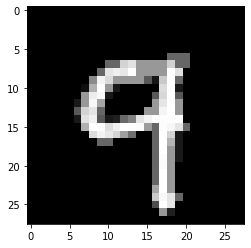

tensor(0.1278, device='cuda:0')


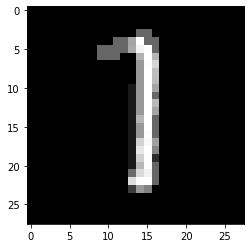

tensor(0.0254, device='cuda:0')


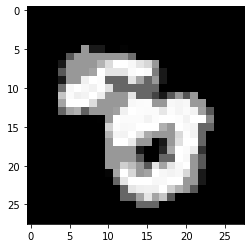

tensor(0.0814, device='cuda:0')


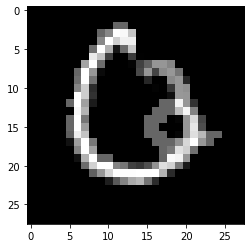

tensor(0.0153, device='cuda:0')


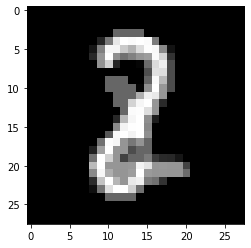

tensor(6.1117e-07, device='cuda:0')


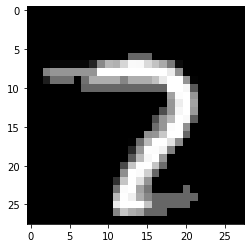

tensor(0.0151, device='cuda:0')


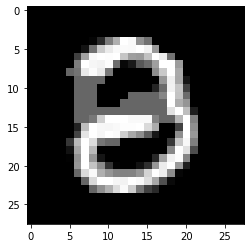

tensor(0.0053, device='cuda:0')


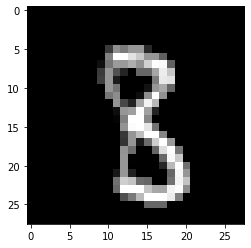

tensor(0.0379, device='cuda:0')


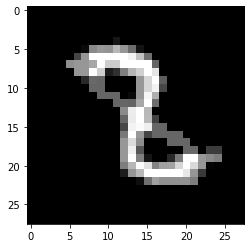

tensor(0.0002, device='cuda:0')


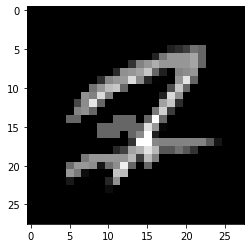

tensor(0.8750, device='cuda:0')


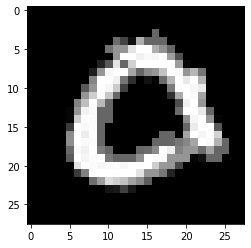

tensor(0.0039, device='cuda:0')


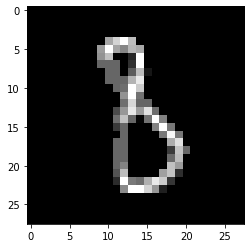

tensor(0.7586, device='cuda:0')


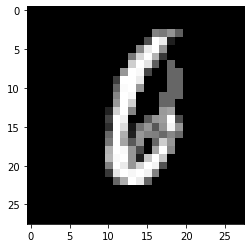

tensor(0.0118, device='cuda:0')


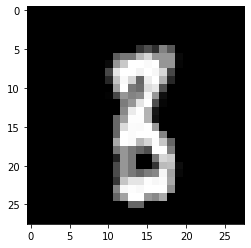

tensor(0.0009, device='cuda:0')


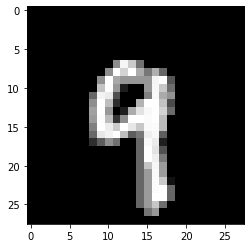

tensor(0.0555, device='cuda:0')


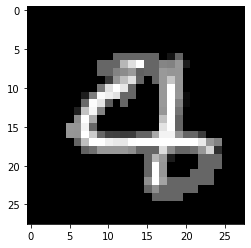

tensor(0.0036, device='cuda:0')


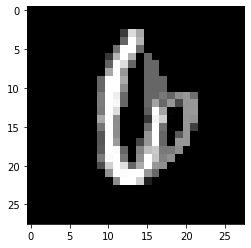

tensor(0.3273, device='cuda:0')


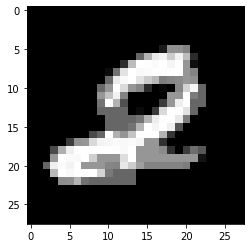

tensor(0.0017, device='cuda:0')


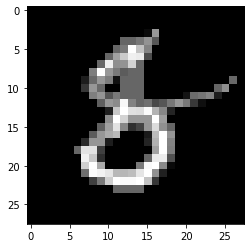

tensor(0.0018, device='cuda:0')


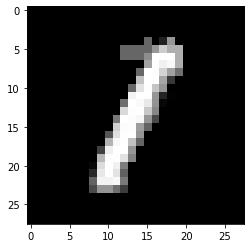

tensor(0.0212, device='cuda:0')


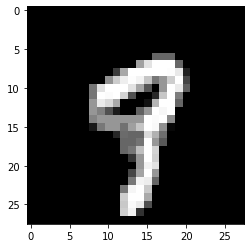

tensor(0.0389, device='cuda:0')


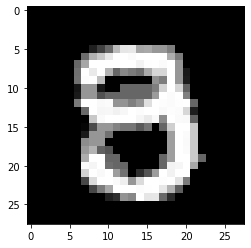

tensor(0.0141, device='cuda:0')


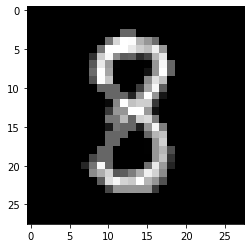

tensor(1.7862e-05, device='cuda:0')


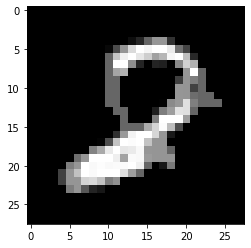

tensor(0.0006, device='cuda:0')


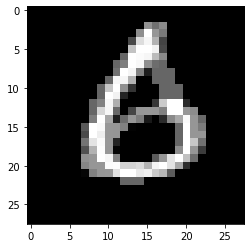

tensor(0.5768, device='cuda:0')


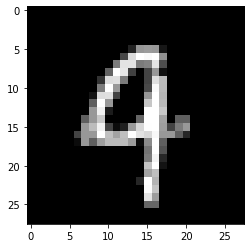

tensor(0.1204, device='cuda:0')


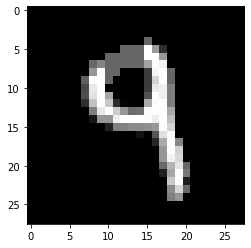

tensor(0.0017, device='cuda:0')


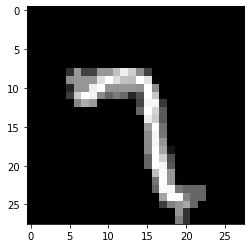

tensor(0.1507, device='cuda:0')


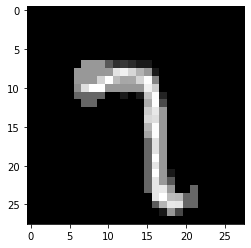

tensor(0.0066, device='cuda:0')


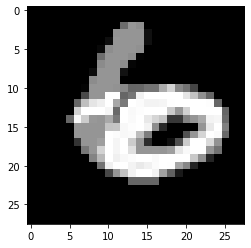

tensor(0.8209, device='cuda:0')


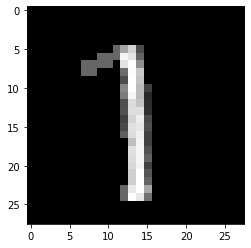

tensor(0.0769, device='cuda:0')


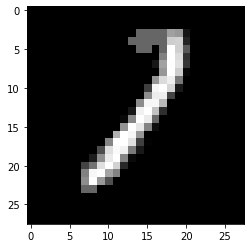

tensor(0.0020, device='cuda:0')


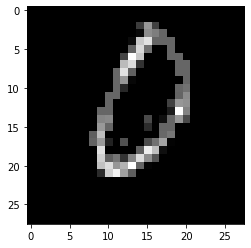

tensor(0.0272, device='cuda:0')


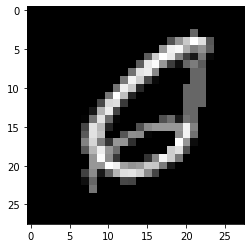

tensor(0.0268, device='cuda:0')


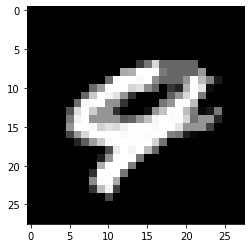

tensor(0.0089, device='cuda:0')


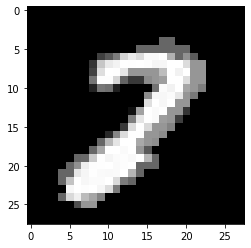

tensor(0.1936, device='cuda:0')


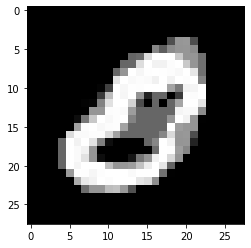

tensor(3.2956e-07, device='cuda:0')


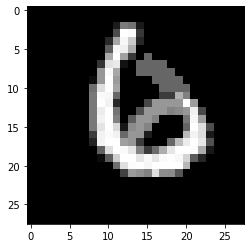

tensor(0.0684, device='cuda:0')


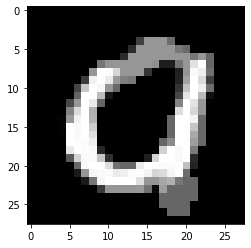

tensor(0.0008, device='cuda:0')


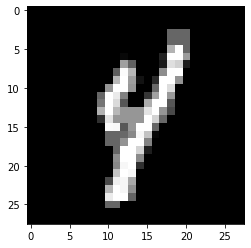

tensor(0.0004, device='cuda:0')


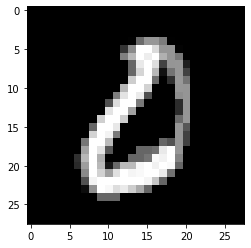

tensor(0.0208, device='cuda:0')


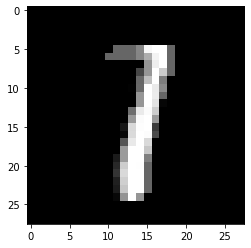

tensor(0.2993, device='cuda:0')


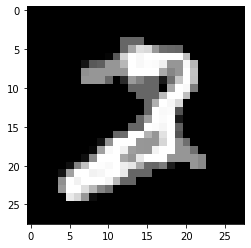

tensor(0.0225, device='cuda:0')


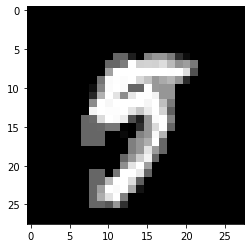

tensor(0.0047, device='cuda:0')


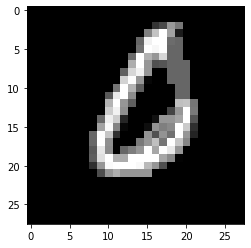

tensor(0.0702, device='cuda:0')


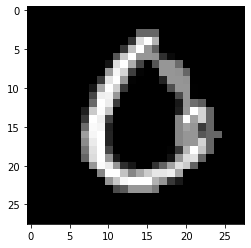

tensor(0.2343, device='cuda:0')


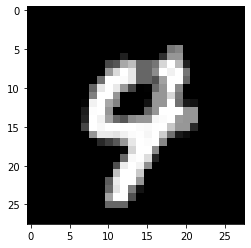

tensor(0.0771, device='cuda:0')


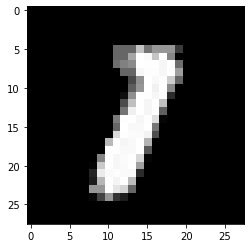

tensor(0.0677, device='cuda:0')


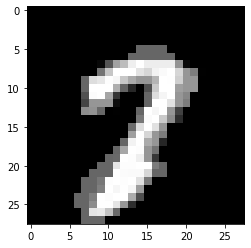

tensor(0.2621, device='cuda:0')


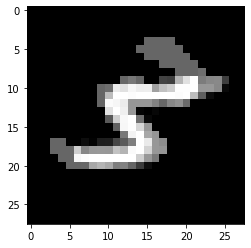

tensor(1.2287e-05, device='cuda:0')


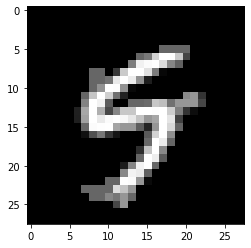

tensor(0.1769, device='cuda:0')


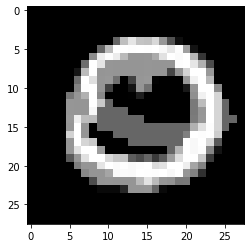

tensor(0.0153, device='cuda:0')


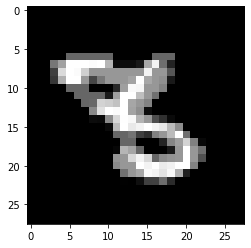

tensor(0.9517, device='cuda:0')


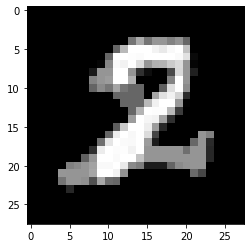

tensor(7.3137e-05, device='cuda:0')


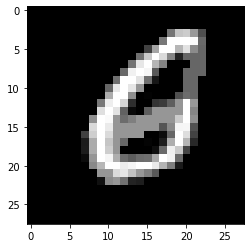

tensor(0.0076, device='cuda:0')


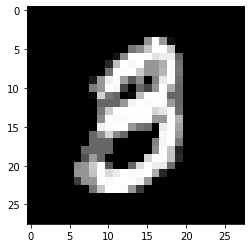

tensor(0.0007, device='cuda:0')


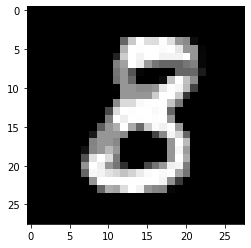

tensor(0.0421, device='cuda:0')


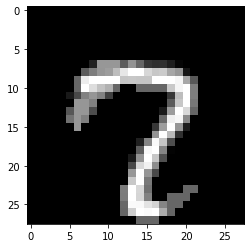

tensor(0.4713, device='cuda:0')


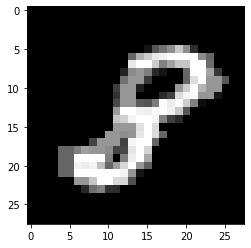

tensor(0.0014, device='cuda:0')


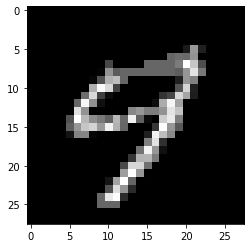

tensor(0.1773, device='cuda:0')


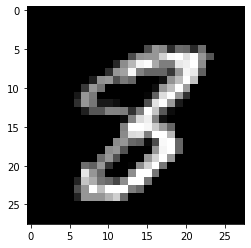

tensor(0.0095, device='cuda:0')


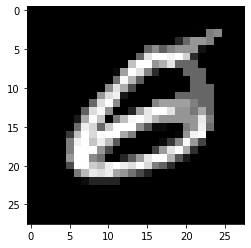

tensor(0.0296, device='cuda:0')


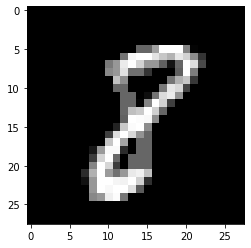

tensor(0.0642, device='cuda:0')


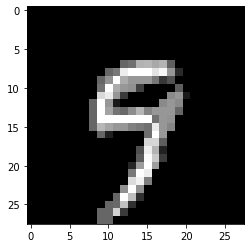

tensor(0.0008, device='cuda:0')


In [63]:
test = torch.stack([transform(x) for x in linf_aut_eps04])
out = D(test.cuda())
for sample, p in zip(test, out):
    plt.imshow(sample[0], cmap="gray")
    plt.show()
    print(p.data)

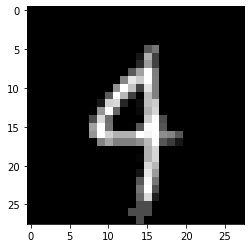

tensor(0.0207, device='cuda:0')


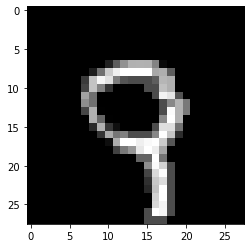

tensor(0.5968, device='cuda:0')


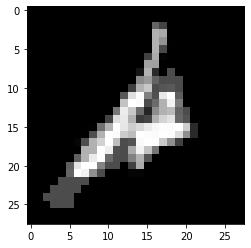

tensor(0.0473, device='cuda:0')


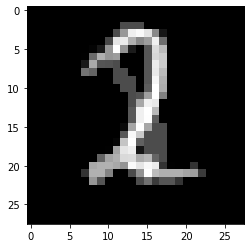

tensor(0.0005, device='cuda:0')


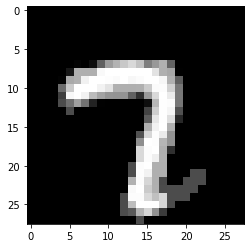

tensor(0.6220, device='cuda:0')


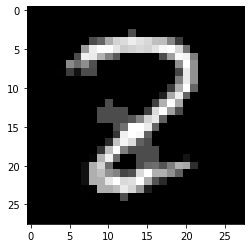

tensor(8.5227e-05, device='cuda:0')


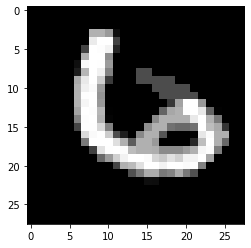

tensor(0.0053, device='cuda:0')


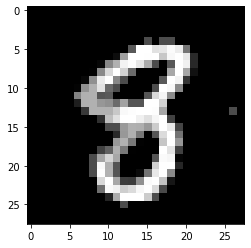

tensor(0.0088, device='cuda:0')


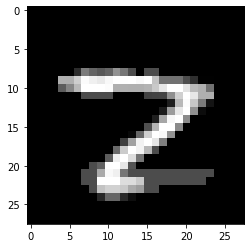

tensor(0.0001, device='cuda:0')


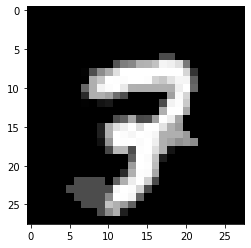

tensor(0.0034, device='cuda:0')


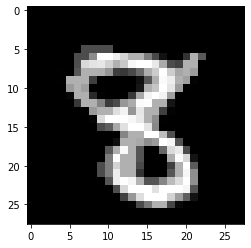

tensor(0.0007, device='cuda:0')


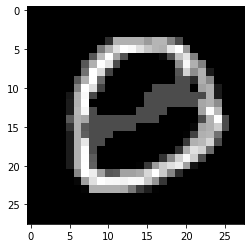

tensor(0.0003, device='cuda:0')


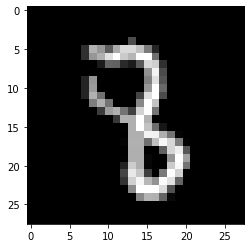

tensor(0.0927, device='cuda:0')


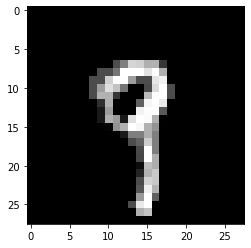

tensor(0.7915, device='cuda:0')


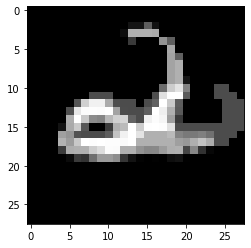

tensor(1.0706e-05, device='cuda:0')


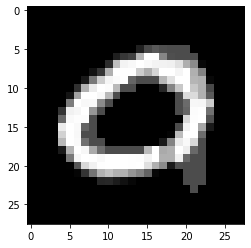

tensor(0.1268, device='cuda:0')


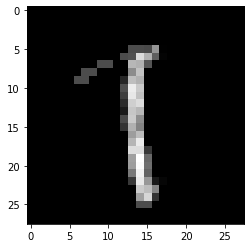

tensor(0.0796, device='cuda:0')


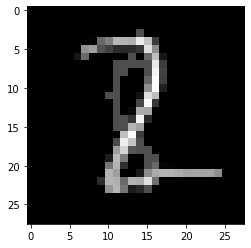

tensor(0.0197, device='cuda:0')


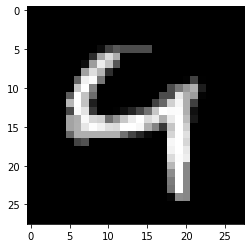

tensor(0.0073, device='cuda:0')


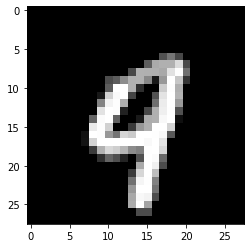

tensor(0.0319, device='cuda:0')


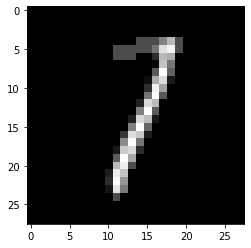

tensor(0.0169, device='cuda:0')


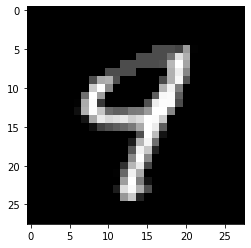

tensor(0.0020, device='cuda:0')


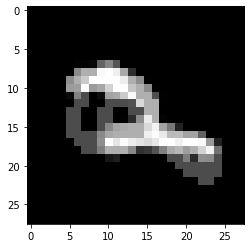

tensor(0.0021, device='cuda:0')


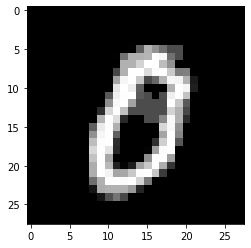

tensor(0.0009, device='cuda:0')


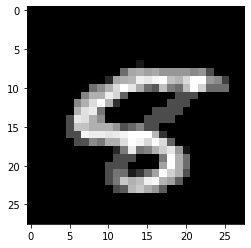

tensor(0.7941, device='cuda:0')


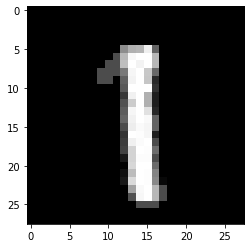

tensor(0.2231, device='cuda:0')


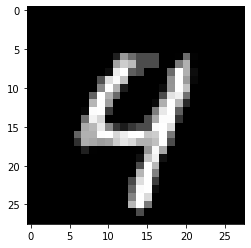

tensor(0.0107, device='cuda:0')


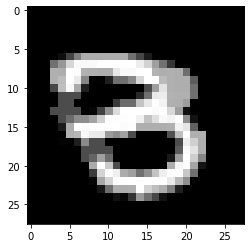

tensor(0.1161, device='cuda:0')


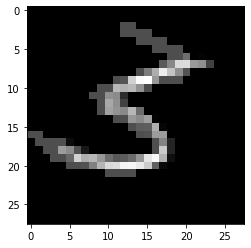

tensor(0.1723, device='cuda:0')


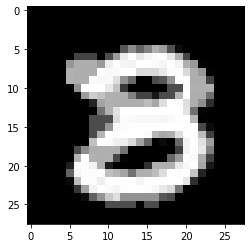

tensor(0.0013, device='cuda:0')


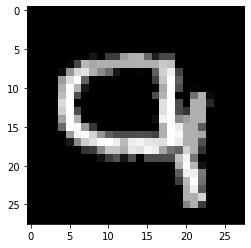

tensor(0.8855, device='cuda:0')


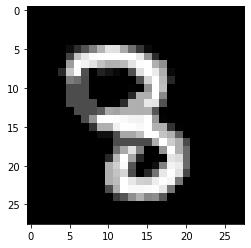

tensor(0.0061, device='cuda:0')


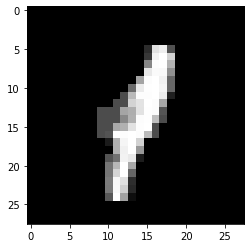

tensor(4.8850e-05, device='cuda:0')


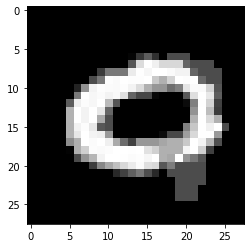

tensor(0.3502, device='cuda:0')


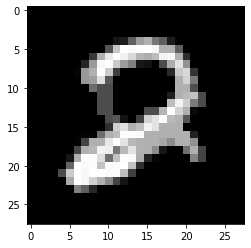

tensor(0.0001, device='cuda:0')


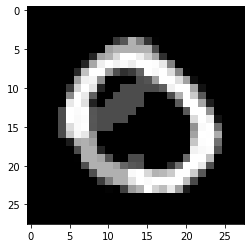

tensor(0.0003, device='cuda:0')


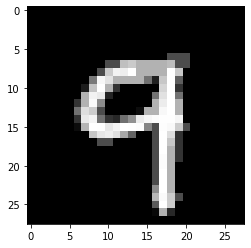

tensor(0.1649, device='cuda:0')


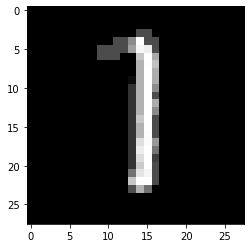

tensor(0.0258, device='cuda:0')


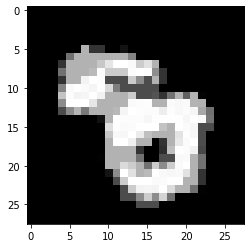

tensor(0.0062, device='cuda:0')


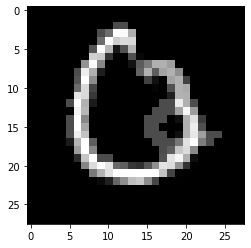

tensor(0.0211, device='cuda:0')


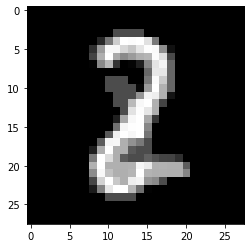

tensor(9.1359e-07, device='cuda:0')


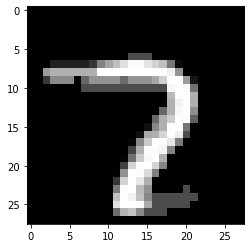

tensor(0.0163, device='cuda:0')


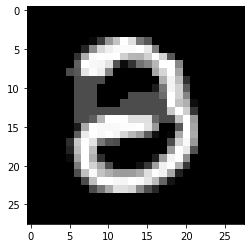

tensor(0.0026, device='cuda:0')


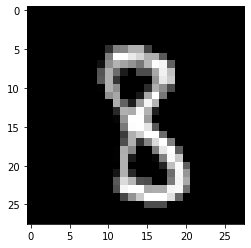

tensor(0.1138, device='cuda:0')


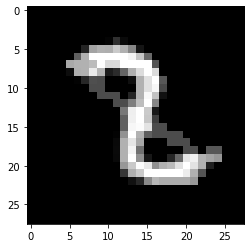

tensor(0.0004, device='cuda:0')


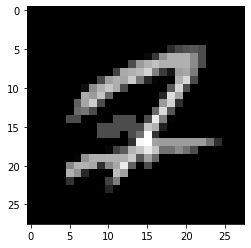

tensor(0.7548, device='cuda:0')


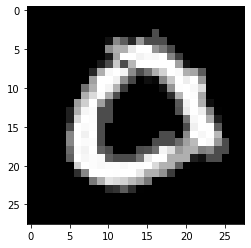

tensor(0.0049, device='cuda:0')


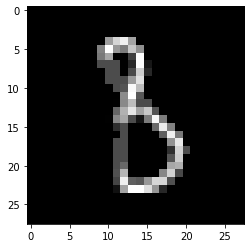

tensor(0.5998, device='cuda:0')


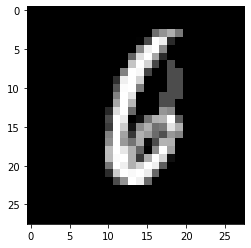

tensor(0.0198, device='cuda:0')


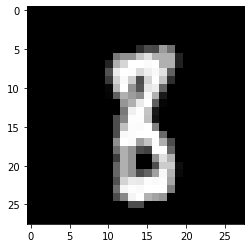

tensor(0.0018, device='cuda:0')


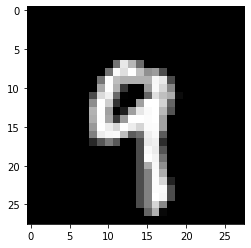

tensor(0.0595, device='cuda:0')


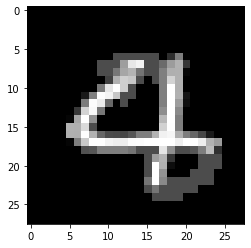

tensor(0.0062, device='cuda:0')


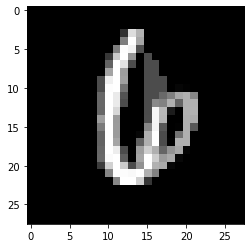

tensor(0.3923, device='cuda:0')


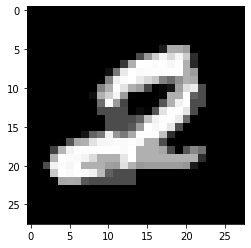

tensor(0.0134, device='cuda:0')


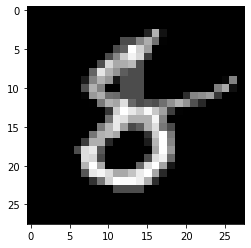

tensor(0.0013, device='cuda:0')


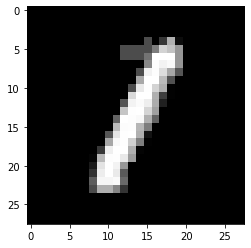

tensor(0.0286, device='cuda:0')


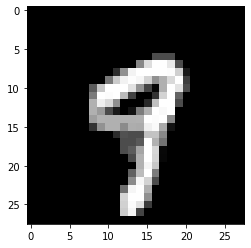

tensor(0.0725, device='cuda:0')


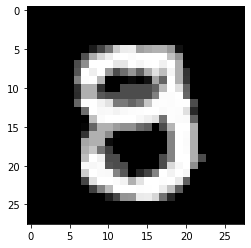

tensor(0.0633, device='cuda:0')


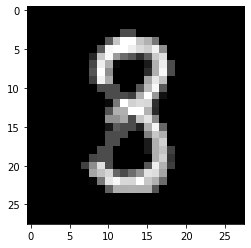

tensor(0.0001, device='cuda:0')


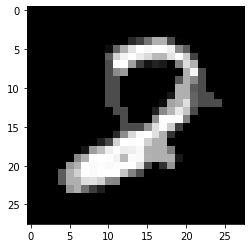

tensor(0.0048, device='cuda:0')


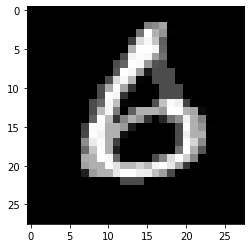

tensor(0.5135, device='cuda:0')


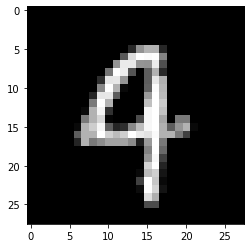

tensor(0.4337, device='cuda:0')


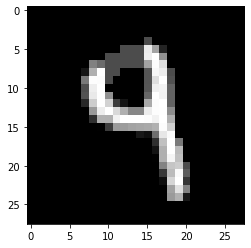

tensor(0.0007, device='cuda:0')


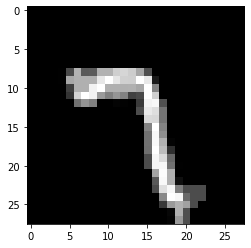

tensor(0.2386, device='cuda:0')


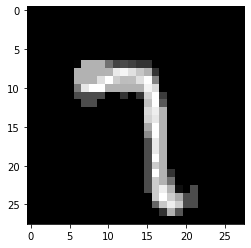

tensor(0.0086, device='cuda:0')


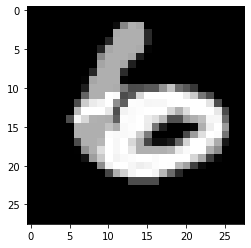

tensor(0.2532, device='cuda:0')


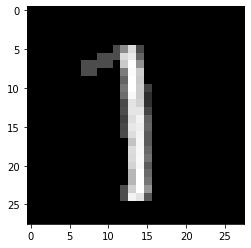

tensor(0.0998, device='cuda:0')


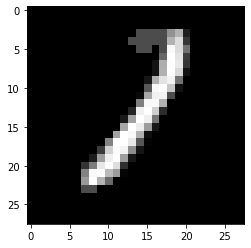

tensor(0.0025, device='cuda:0')


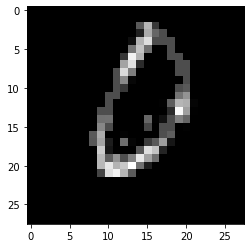

tensor(0.1238, device='cuda:0')


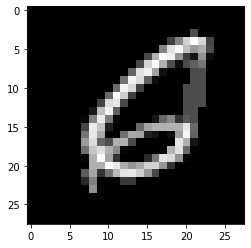

tensor(0.0179, device='cuda:0')


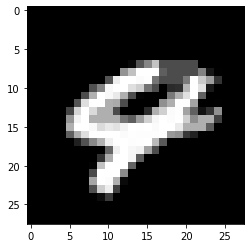

tensor(0.0184, device='cuda:0')


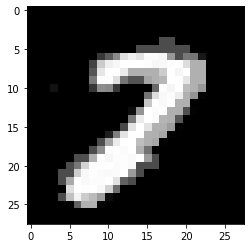

tensor(0.5436, device='cuda:0')


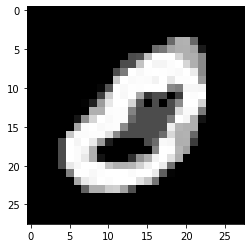

tensor(5.5517e-06, device='cuda:0')


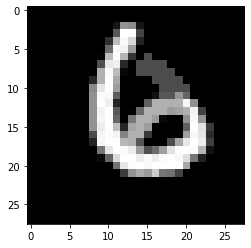

tensor(0.0532, device='cuda:0')


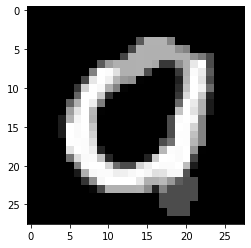

tensor(0.0014, device='cuda:0')


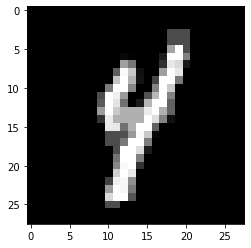

tensor(0.0004, device='cuda:0')


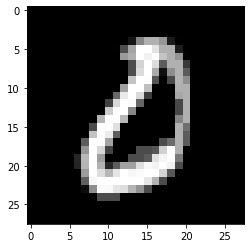

tensor(0.0124, device='cuda:0')


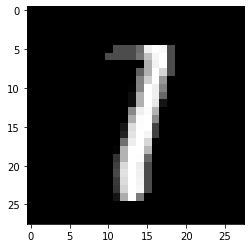

tensor(0.2470, device='cuda:0')


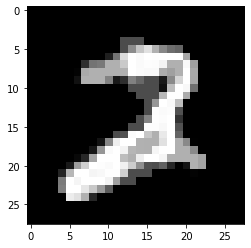

tensor(0.0753, device='cuda:0')


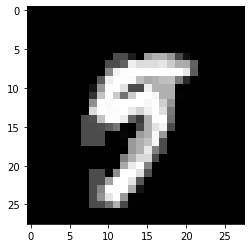

tensor(0.0059, device='cuda:0')


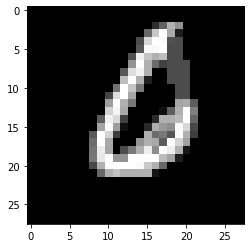

tensor(0.0696, device='cuda:0')


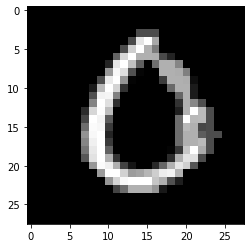

tensor(0.2193, device='cuda:0')


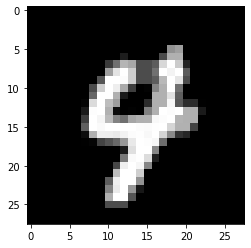

tensor(0.0711, device='cuda:0')


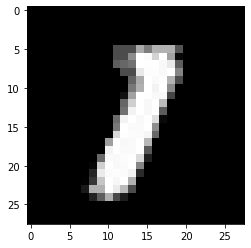

tensor(0.0502, device='cuda:0')


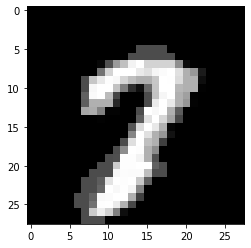

tensor(0.3703, device='cuda:0')


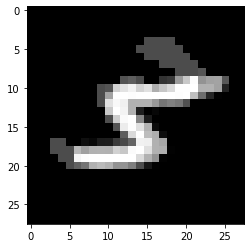

tensor(5.0155e-05, device='cuda:0')


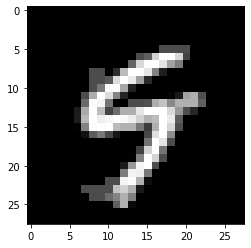

tensor(0.0723, device='cuda:0')


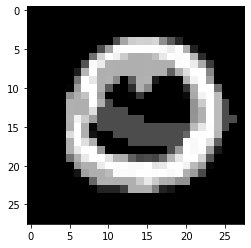

tensor(0.0229, device='cuda:0')


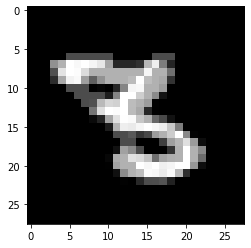

tensor(0.9611, device='cuda:0')


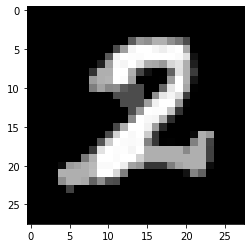

tensor(0.0033, device='cuda:0')


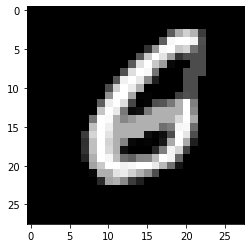

tensor(0.0794, device='cuda:0')


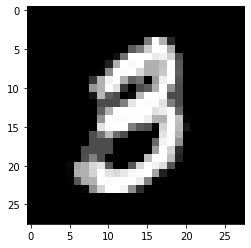

tensor(0.0107, device='cuda:0')


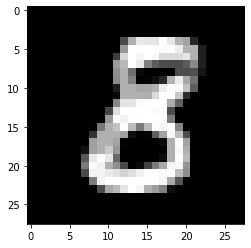

tensor(0.0322, device='cuda:0')


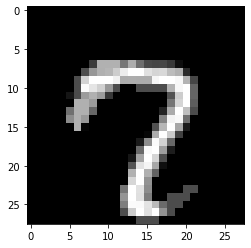

tensor(0.4420, device='cuda:0')


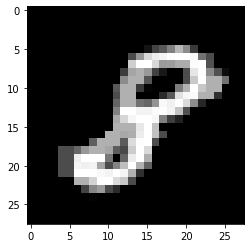

tensor(0.0022, device='cuda:0')


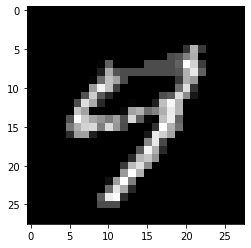

tensor(0.2357, device='cuda:0')


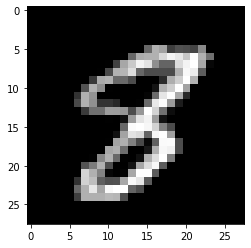

tensor(0.0095, device='cuda:0')


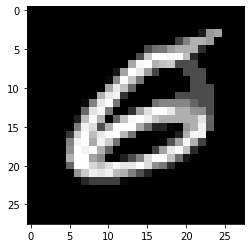

tensor(0.0177, device='cuda:0')


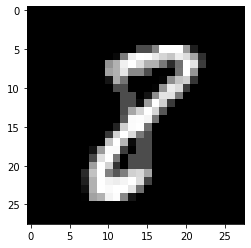

tensor(0.0296, device='cuda:0')


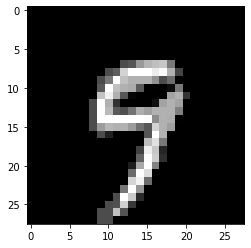

tensor(0.0042, device='cuda:0')


In [64]:
test = torch.stack([transform(x) for x in linf_aut_eps03])
out = D(test.cuda())
for sample, p in zip(test, out):
    plt.imshow(sample[0], cmap="gray")
    plt.show()
    print(p.data)